# Decision trees

In [1]:
from sklearn import tree
X=[[0,0],[1,1]]
Y=[0,1]


In [2]:
clf=tree.DecisionTreeClassifier()
clf=clf.fit(X,Y)

In [8]:
clf.predict([[2,2],[0,1],[0,-3]])

array([1, 1, 0])

In [9]:
clf.predict_proba([[2,2]])

array([[ 0.,  1.]])

In [10]:
import graphviz
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)

# For Iris Dataset

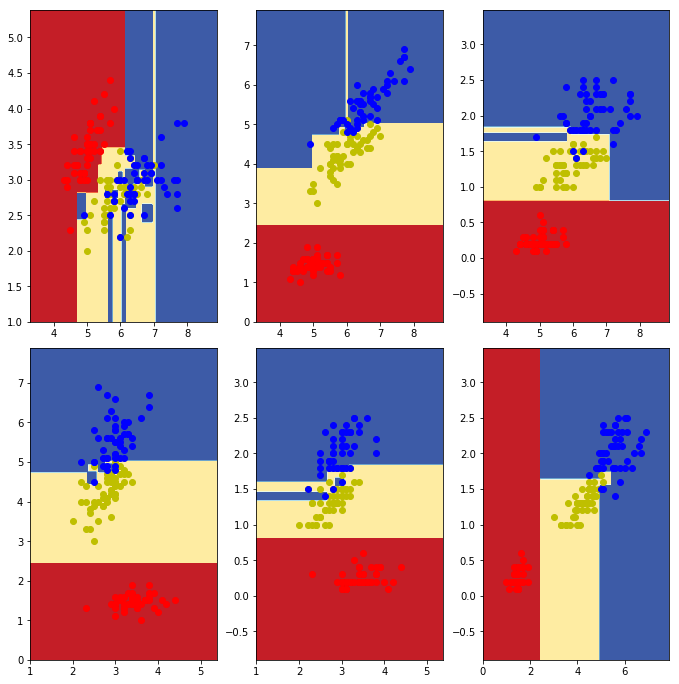

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier


#Parameter
n_classes=3
plot_colors='ryb'
plot_step=0.02

#Load Data
iris=load_iris()
plt.figure(figsize=(10,10))
for pairidx,pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
    X=iris.data[:,pair]
    Y=iris.target
    clf=DecisionTreeClassifier().fit(X,Y)
    
    #Plot the decision boundary
    plt.subplot(2,3,pairidx+1)
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    XX,YY=np.meshgrid(np.arange(x_min,x_max,plot_step),
                     np.arange(y_min,y_max,plot_step))
    plt.tight_layout(h_pad=0.5,w_pad=0.5,pad=2.5)
    Z=clf.predict(np.c_[XX.ravel(),YY.ravel()])
    Z=Z.reshape(XX.shape)
    cs=plt.contourf(XX,YY,Z,cmap=plt.cm.RdYlBu)
    #plt.xlabel(iris.feature_name[pair[0]])
    #plt.ylabel(iris.feature_name[pair[1]])
    for i,color in zip(range(n_classes),plot_colors):
        idx=np.where(Y==i)
        plt.scatter(X[idx,0],X[idx,1],c=color)
    
plt.show()